<a href="https://colab.research.google.com/github/kseniia308/Hausaufgaben/blob/task3/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')

Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

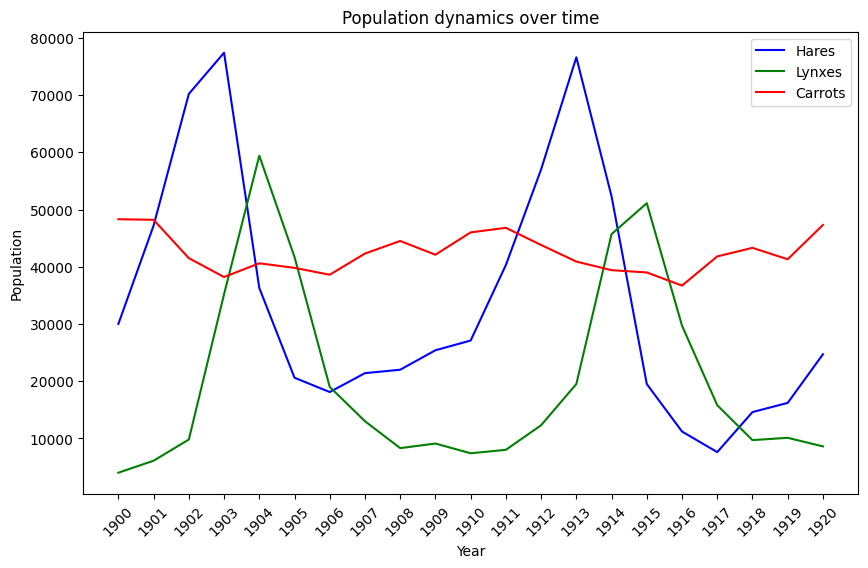

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(data[:, 0], data[:, 1], color ='blue', label = 'Hares')
plt.plot(data[:, 0], data[:, 2], color ='green', label = 'Lynxes')
plt.plot(data[:, 0], data[:, 3], color = 'red', label = 'Carrots')

plt.xticks(data[:, 0], rotation = 45)

plt.title('Population dynamics over time')
plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()

plt.show()




Find which year each species had the largest population. Mark these years in the plot of populations.

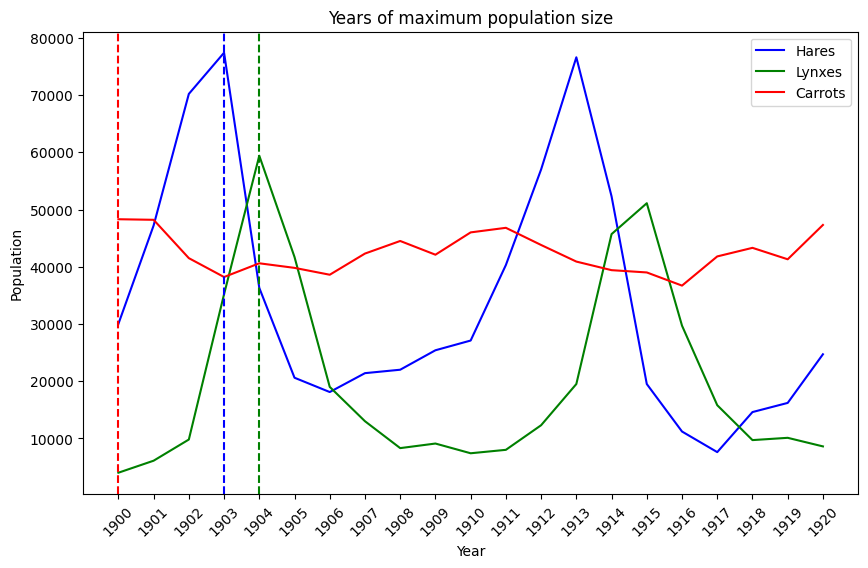

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(data[:, 0], data[:, 1], color ='blue', label = 'Hares')
plt.plot(data[:, 0], data[:, 2], color ='green', label = 'Lynxes')
plt.plot(data[:, 0], data[:, 3], color = 'red', label = 'Carrots')

plt.axvline(x=data[np.argmax(data[:,1]),0], color = 'blue', linestyle='--')
plt.axvline(x=data[np.argmax(data[:,2]),0], color = 'green', linestyle='--')
plt.axvline(x=data[np.argmax(data[:,3]),0], color = 'red', linestyle='--')


plt.xticks(data[:, 0], rotation = 45)
plt.title('Years of maximum population size')
plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()

plt.show()





Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

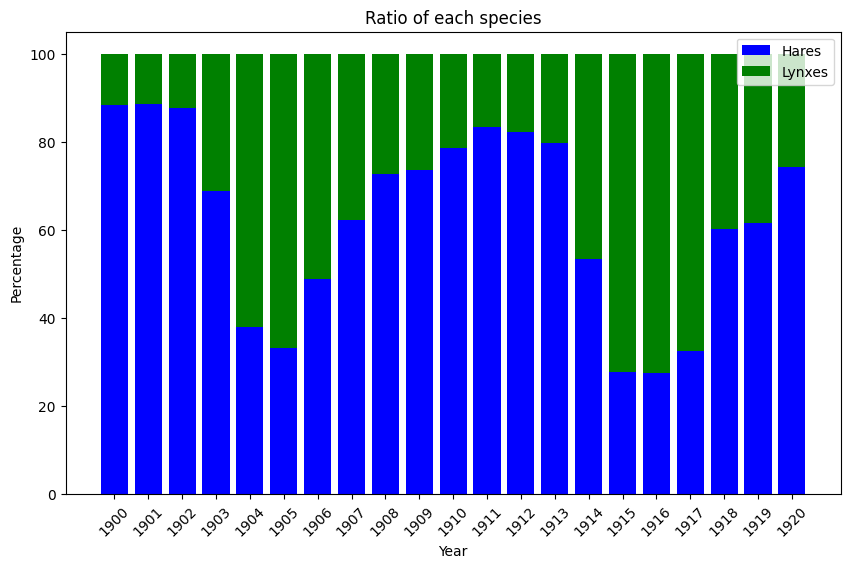

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(data[:, 0], 100*data[:, 1]/(data[:, 1] + data[:, 2]), label = 'Hares', color = 'blue')
plt.bar(data[:, 0], 100*data[:, 2]/(data[:, 1] + data[:, 2]), bottom = 100*data[:, 1]/(data[:, 1] + data[:, 2]), label= 'Lynxes', color = 'green')

plt.xticks(data[:, 0], rotation = 45)
plt.title('Ratio of each species')
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.legend()
plt.show()


Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

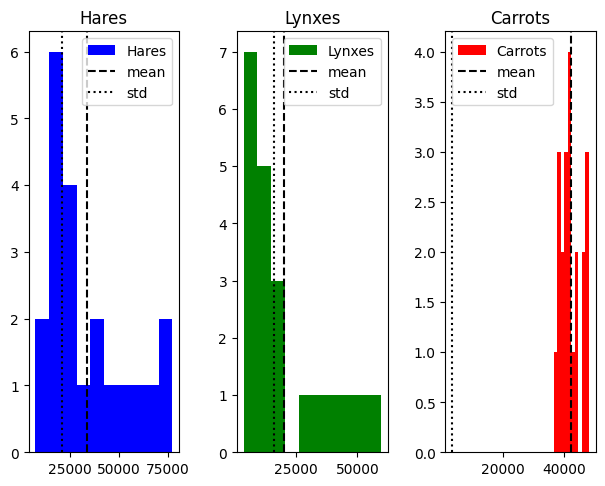

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.tight_layout()

ax1.hist(data[:, 1], label = 'Hares', color = 'blue', bins = 10)
ax1.axvline(x = np.mean(data[:, 1]), color = 'black', linestyle = '--', label = 'mean')
ax1.axvline(x = np.std(data[:, 1]), color = 'black', linestyle = ':', label = 'std')
ax1.set_title('Hares')
ax1.legend()

ax2.hist(data[:, 2], label = 'Lynxes', color = 'green', bins = 10)
ax2.axvline(x = np.mean(data[:, 2]), color = 'black', linestyle = '--', label = 'mean')
ax2.axvline(x = np.std(data[:, 2]), color = 'black', linestyle = ':', label = 'std')
ax2.set_title('Lynxes')
ax2.legend()

ax3.hist(data[:, 3], label = 'Carrots', color = 'red', bins = 10)
ax3.axvline(x = np.mean(data[:, 3]), color = 'black', linestyle = '--', label = 'mean')
ax3.axvline(x = np.std(data[:, 3]), color = 'black', linestyle = ':', label = 'std')
ax3.set_title('Carrots')
ax3.legend()


plt.show()



Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


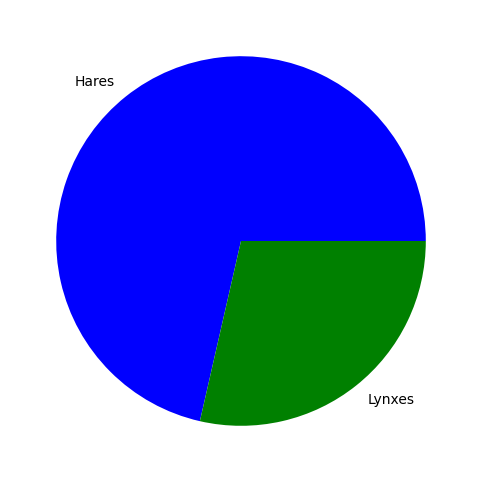

In [ ]:

arr = np.full(data[:, 0].size, 'L')
arr[(data[:, 1] - data[:, 2]) > 0] = 'H'
print(arr)

counts = [np.sum(arr == 'H'), np.sum(arr == 'L')]
labels = ['Hares', 'Lynxes']
colors = ['blue', 'green']


plt.figure(figsize = (10, 6))
plt.pie(counts, labels = labels, colors = colors)
plt.show()


Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

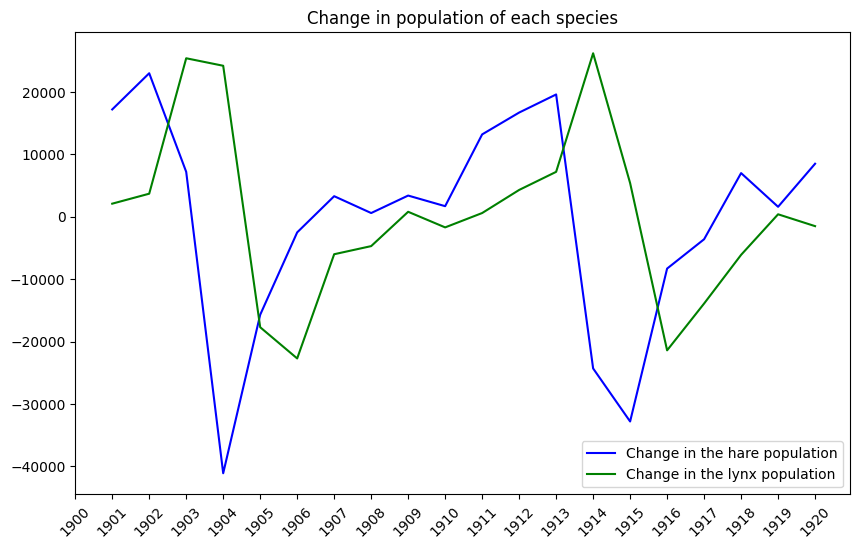

[[ 1.         -0.17801366]
 [-0.17801366  1.        ]]


In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(data[1:, 0], data[1:, 1] - data[:-1, 1], label = 'Change in the hare population', color = 'blue')
plt.plot(data[1:, 0], data[1:, 2] - data[:-1, 2], label = 'Change in the lynx population', color = 'green')
plt.xticks(data[:, 0], rotation = 45)
plt.title('Change in population of each species')
plt.legend()
plt.show()

cor = np.corrcoef(data[1:, 2] - data[:-1, 2], data[1:, 1]-data[:-1, 1])
print(cor)


Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

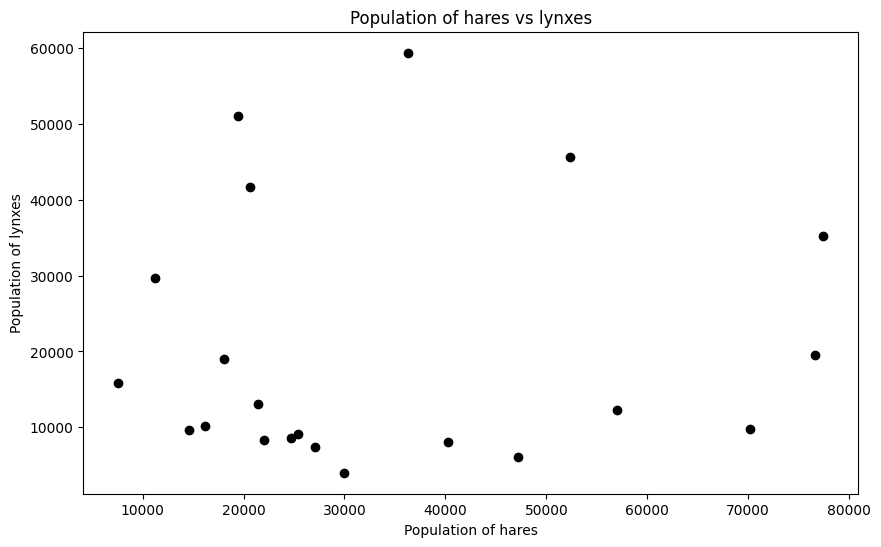

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(data[:, 1], data[:, 2], color = 'black')
plt.title('Population of hares vs lynxes')
plt.xlabel('Population of hares')
plt.ylabel('Population of lynxes')

plt.show()


Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [ ]:
abs((np.median(np.delete(data[:, 1], np.where(data[:, 0] == 1920)))/data[np.where(data[:, 0] == 1920)[0][0], 1]) - 1)

0.06275303643724706